## Data Import and Initial cleanup

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

raw_data = pd.read_csv("data.csv")
df = raw_data[['Proppant size','Fluid type', '180 oil', '365 Oil', 'Horizontal Length','Lat', 'Long','Proppant per foot', 'Fluid per foot', 'ft/stage', 'Year']]


df.isna().sum()

Proppant size        355
Fluid type             0
180 oil                0
365 Oil                0
Horizontal Length      0
Lat                    0
Long                   0
Proppant per foot      0
Fluid per foot         0
ft/stage             145
Year                   0
dtype: int64

In [2]:
from sklearn.preprocessing import OneHotEncoder
df.dropna()
binary = OneHotEncoder()
fluidType = binary.fit_transform(df["Fluid type"].values.reshape(-1,1)).toarray()

In [3]:
#Dummy variables have been created for the fluid type
df['slickwater'] = fluidType[:,0]
df['water/gel'] = fluidType[:,1]

df

C:\Users\m7md2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\m7md2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Proppant size,Fluid type,180 oil,365 Oil,Horizontal Length,Lat,Long,Proppant per foot,Fluid per foot,ft/stage,Year,slickwater,water/gel
0,30/50,WATER/GEL,5499,7297,4572.15,33.080673,-103.689369,314.489463,10.302374,NaN,2010,0.0,1.0
1,NaN,SLICKWATER,106837,153187,4691.53,32.065822,-103.699425,1390.173142,37.957340,NaN,2015,1.0,0.0
2,NaN,SLICKWATER,70628,112969,4321.02,32.564954,-103.554521,2289.973432,41.523066,NaN,2018,1.0,0.0
3,30/50,WATER/GEL,25582,45008,4268.44,32.727902,-103.579690,1946.801173,43.100992,NaN,2014,0.0,1.0
4,NaN,SLICKWATER,164336,232600,4582.34,32.022338,-103.569939,1520.595154,35.072474,152.744667,2015,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,NaN,SLICKWATER,386507,278786,9958.31,32.269360,-103.789083,1972.042947,13.694994,203.230816,2018,1.0,0.0
435,"40/70,100",SLICKWATER,324026,100367,7209.85,32.000797,-103.995675,1997.411874,40.562564,NaN,2019,1.0,0.0
436,NaN,SLICKWATER,511292,235539,11872.38,32.297333,-103.914179,2454.111644,100.649575,201.226780,2020,1.0,0.0
437,NaN,SLICKWATER,107474,102610,5146.66,32.267427,-103.748005,1458.110503,62.209860,205.866400,2019,1.0,0.0


In [4]:
df.describe()

,180 oil,365 Oil,Horizontal Length,Lat,Long,Proppant per foot,Fluid per foot,ft/stage,Year,slickwater,water/gel
count,439.000000,439.000000,439.000000,439.000000,439.000000,4.390000e+02,439.000000,294.000000,439.000000,439.000000,439.000000
mean,152404.769932,188071.277904,6346.814260,32.144522,-103.583396,6.486680e+04,1619.218301,238.729248,2018.056948,0.970387,0.029613
std,104230.073330,89665.670915,2274.717216,0.149153,0.166295,6.742031e+05,16970.233350,69.758216,1.309934,0.169710,0.169710
min,2855.000000,1597.000000,1.210000,32.000797,-104.310624,4.008268e+01,1.010323,0.043214,2010.000000,0.000000,0.000000
25%,89730.000000,123773.500000,4781.575000,32.049667,-103.601141,2.064251e+03,34.514766,202.848439,2018.000000,1.000000,0.000000
50%,125953.000000,170967.000000,5053.390000,32.100261,-103.555981,2.353073e+03,40.787482,237.919768,2018.000000,1.000000,0.000000
75%,181369.500000,237429.500000,7538.485000,32.184124,-103.509083,2.502901e+03,48.914089,272.583750,2019.000000,1.000000,0.000000
max,791713.000000,667486.000000,13599.810000,33.080673,-103.252439,9.150463e+06,222301.652900,909.808000,2020.000000,1.000000,1.000000


In [5]:
df_1 = df[['180 oil', '365 Oil', 'Horizontal Length','Proppant per foot', 'Fluid per foot', 'ft/stage',
           'slickwater', 'water/gel']]

In [6]:
df.columns

Index(['Proppant size', 'Fluid type', '180 oil', '365 Oil',
       'Horizontal Length', 'Lat', 'Long', 'Proppant per foot',
       'Fluid per foot', 'ft/stage', 'Year', 'slickwater', 'water/gel'],
      dtype='object')

In [7]:
df = df[df ['Horizontal Length'] >= 500]
df.describe()

,180 oil,365 Oil,Horizontal Length,Lat,Long,Proppant per foot,Fluid per foot,ft/stage,Year,slickwater,water/gel
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,290.000000,432.000000,432.000000,432.000000
mean,151816.055556,188377.923611,6448.775231,32.145093,-103.582017,2250.763457,44.381345,242.021169,2018.055556,0.969907,0.030093
std,103347.074022,90187.353165,2145.859251,0.149326,0.165906,626.425683,20.853204,64.298555,1.317970,0.171040,0.171040
min,2855.000000,1597.000000,2333.460000,32.000797,-104.310624,40.082681,1.010323,72.920625,2010.000000,0.000000,0.000000
25%,89099.500000,123790.750000,4787.752500,32.049695,-103.600811,2043.544543,34.221913,206.033490,2018.000000,1.000000,0.000000
50%,126186.500000,171168.000000,5079.380000,32.103335,-103.555891,2345.860654,40.484661,239.015631,2018.000000,1.000000,0.000000
75%,180833.250000,240774.500000,7556.297500,32.186701,-103.509008,2493.937214,48.157636,273.345182,2019.000000,1.000000,0.000000
max,791713.000000,667486.000000,13599.810000,33.080673,-103.252439,8044.307595,202.335493,909.808000,2020.000000,1.000000,1.000000


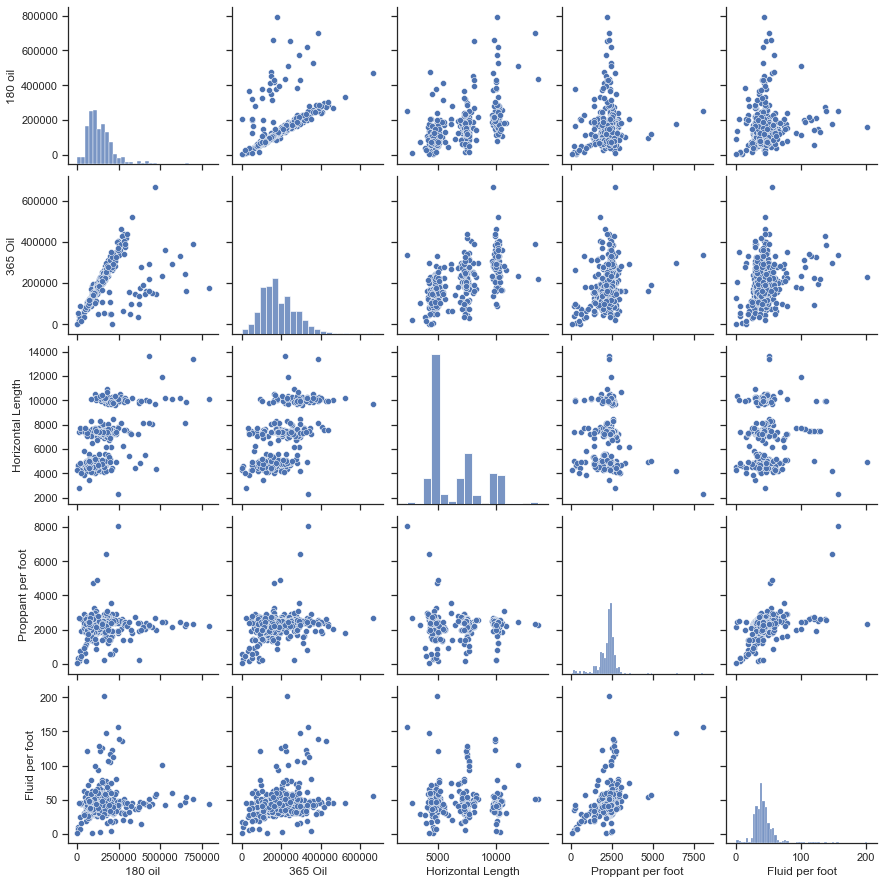

In [8]:
sns.set(style = 'ticks') # Set the background 
sns.color_palette("hls", 8)
sns.pairplot(df[[ '180 oil', '365 Oil','Horizontal Length','Proppant per foot',
       'Fluid per foot']])

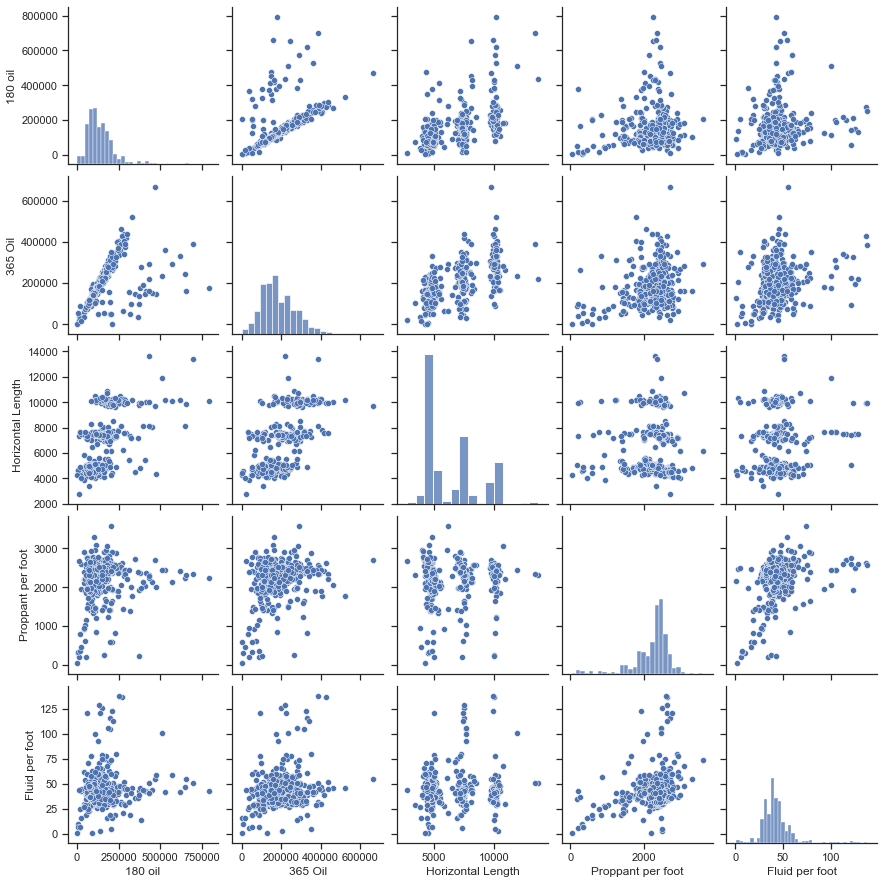

In [9]:
df = df[df ['Proppant per foot'] <= 4000]
df = df[df ['Fluid per foot'] < 150]


sns.pairplot(df[[ '180 oil', '365 Oil','Horizontal Length','Proppant per foot',
       'Fluid per foot']])

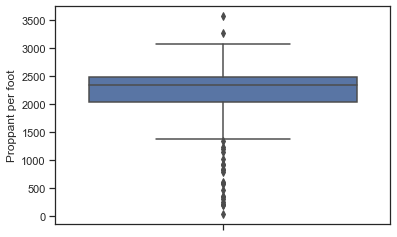

In [10]:
sns.boxplot(y = df['Proppant per foot'])

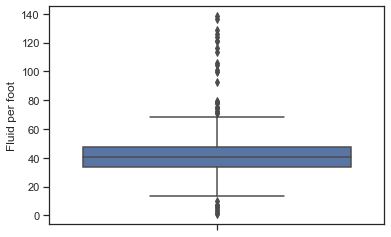

In [11]:
sns.boxplot(y = df['Fluid per foot'])

## Scaling the data

### Standard scaler

In [12]:
from sklearn.cluster import KMeans

df_clean = df [['365 Oil', 'Proppant per foot',
       'Fluid per foot', 'slickwater', 'water/gel']]
df_clean
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(df_clean)


In [13]:
df_clean

,365 Oil,Proppant per foot,Fluid per foot,slickwater,water/gel
0,7297,314.489463,10.302374,0.0,1.0
1,153187,1390.173142,37.957340,1.0,0.0
2,112969,2289.973432,41.523066,1.0,0.0
3,45008,1946.801173,43.100992,0.0,1.0
4,232600,1520.595154,35.072474,1.0,0.0
...,...,...,...,...,...
434,278786,1972.042947,13.694994,1.0,0.0
435,100367,1997.411874,40.562564,1.0,0.0
436,235539,2454.111644,100.649575,1.0,0.0
437,102610,1458.110503,62.209860,1.0,0.0


# Unsupervised Clustering

## Kmeans

In [14]:
SSW = np.zeros(10)

for k in range(1,10):
    
    kmeans_for_Core = KMeans(n_clusters = k, random_state=42).fit(df_s)
    
    SSW[k] = kmeans_for_Core.inertia_

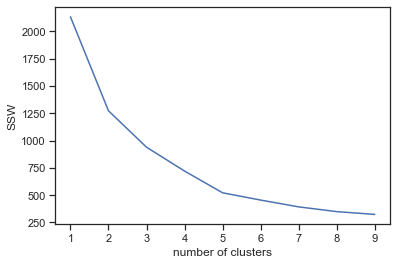

In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

clusters = range(1, 10)
plt.ylabel('SSW')
plt.xlabel('number of clusters')
plt.plot(clusters, SSW[1:10])

### 365 days model

In [16]:
Core_kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 700, random_state = 11)
cluster_labels = Core_kmeans.fit_predict(df_s)

C:\Users\m7md2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


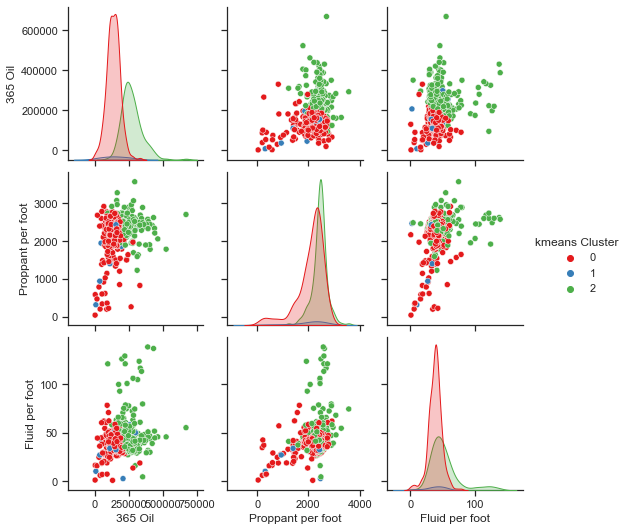

In [17]:
sns.set(style = 'ticks')

df_clean['kmeans Cluster'] = Core_kmeans.labels_

sns.pairplot(df_clean, vars = ['365 Oil','Proppant per foot','Fluid per foot'], hue = 'kmeans Cluster', palette = "Set1")


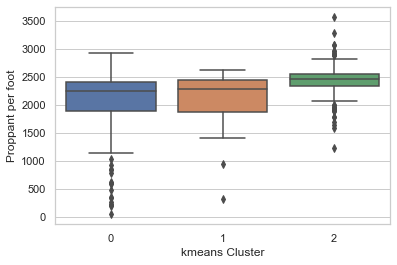

In [18]:
sns.set(style="whitegrid")
sns.boxplot(x=df_clean['kmeans Cluster'], y=df['Proppant per foot'])

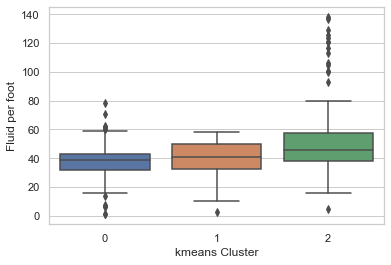

In [19]:
sns.boxplot(x=df_clean['kmeans Cluster'], y=df_clean['Fluid per foot'])

In [20]:
df_clean_1 = df [['365 Oil', 'Proppant per foot', 
       'Fluid per foot']]

s_scaler = StandardScaler()
df_s_1 = s_scaler.fit_transform(df_clean_1)

In [21]:
Core_kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 1000, random_state = 11)
cluster_labels = Core_kmeans.fit_predict(df_s_1)

C:\Users\m7md2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


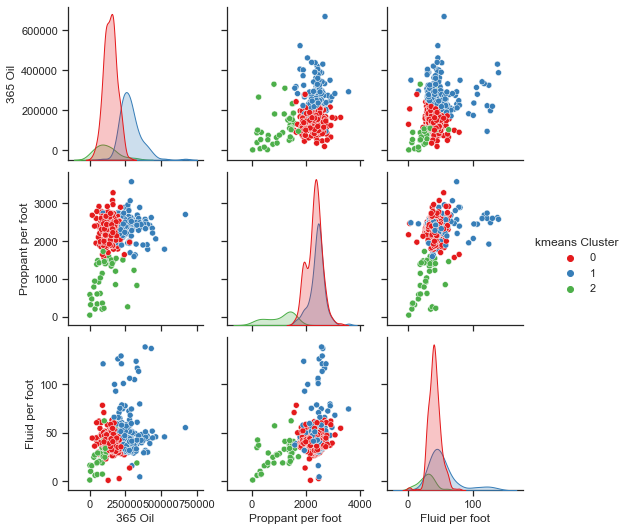

In [22]:
sns.set(style = 'ticks')

df_clean_1['kmeans Cluster'] = Core_kmeans.labels_

sns.pairplot(df_clean_1, palette = "Set1", vars = [ '365 Oil','Proppant per foot','Fluid per foot'], hue = 'kmeans Cluster') 

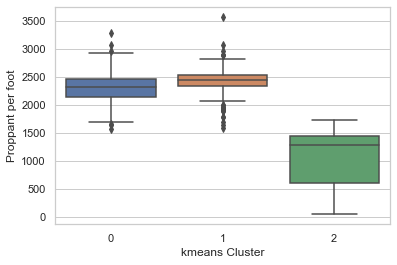

In [23]:
sns.set(style="whitegrid")
sns.boxplot(x=df_clean_1['kmeans Cluster'], y=df_clean_1['Proppant per foot'])

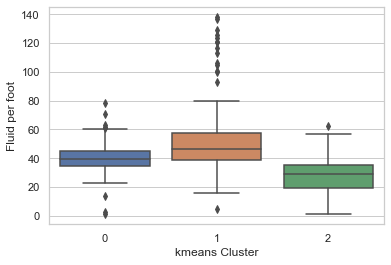

In [24]:
sns.set(style="whitegrid")
sns.boxplot(x=df_clean_1['kmeans Cluster'], y=df_clean_1['Fluid per foot'])

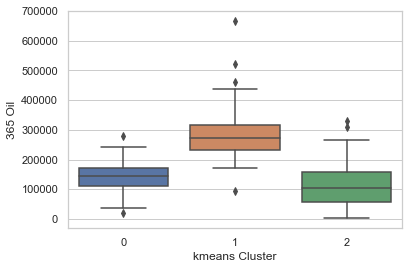

In [25]:
sns.set(style="whitegrid")
sns.boxplot(x=df_clean_1['kmeans Cluster'], y=df_clean_1['365 Oil'])

### 180 model

In [26]:
df_clean_2 = df [['180 oil', 'Proppant per foot', 'Fluid per foot']]

s_scaler = StandardScaler()
df_s_2 = s_scaler.fit_transform(df_clean_2)

Core_kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 1000, random_state = 11)
cluster_labels = Core_kmeans.fit_predict(df_s_2)

C:\Users\m7md2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


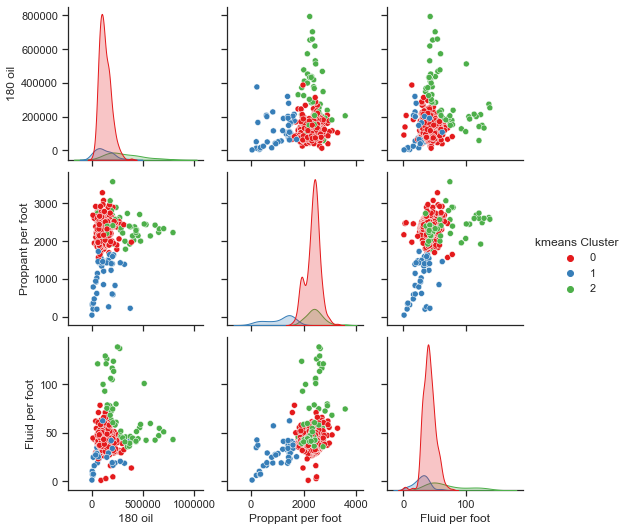

In [27]:
sns.set(style = 'ticks')

df_clean_2['kmeans Cluster'] = Core_kmeans.labels_

sns.pairplot(df_clean_2, palette = "Set1", vars = [ '180 oil','Proppant per foot','Fluid per foot'], hue = 'kmeans Cluster') 

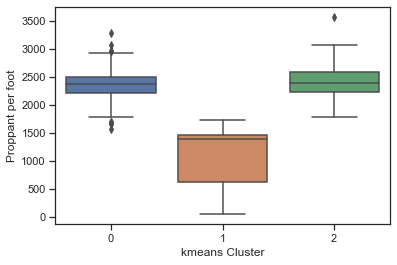

In [28]:
sns.boxplot(x=df_clean_2['kmeans Cluster'], y=df_clean_2['Proppant per foot'])

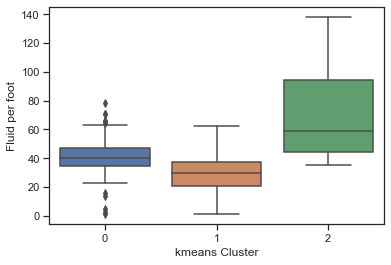

In [29]:
sns.boxplot(x=df_clean_2['kmeans Cluster'], y=df_clean_2['Fluid per foot'])

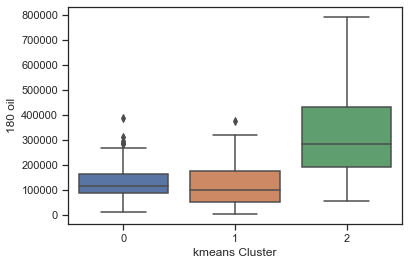

In [30]:
sns.boxplot(x=df_clean_2['kmeans Cluster'], y=df_clean_2['180 oil'])

## Hierarchical Clustering

### 365 model

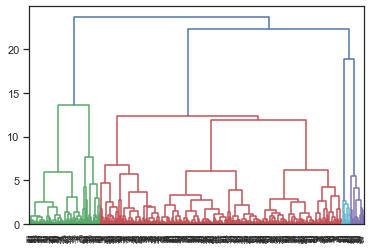

In [31]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

df_clean_3 = df [[ '365 Oil', 'Proppant per foot', 
       'Fluid per foot']]

s_scaler = StandardScaler()
df_s_3 = s_scaler.fit_transform(df_clean_3)

hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(df_s_3)

dendrogram = sch.dendrogram(sch.linkage(df_s_2, method='ward'))

C:\Users\m7md2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


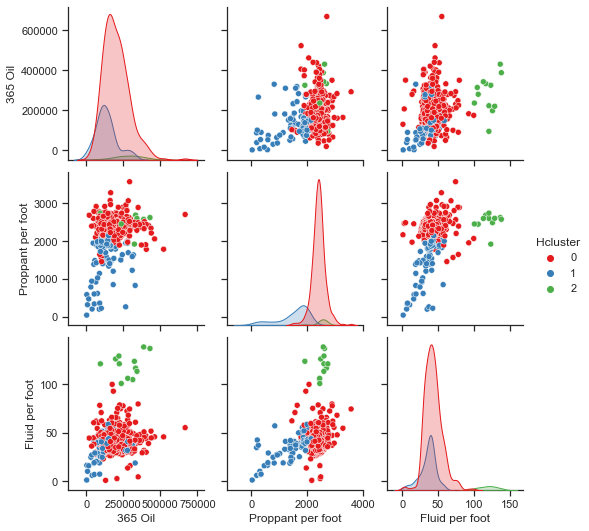

In [32]:
df_clean_3['Hcluster'] = y_hc # Create a new column in df that refers to the rocktypes created

sns.set(style = 'ticks') # Set the background to dark

sns.pairplot(df_clean_3, palette = "Set1", vars = [ '365 Oil','Proppant per foot', 'Fluid per foot'], hue = 'Hcluster') 

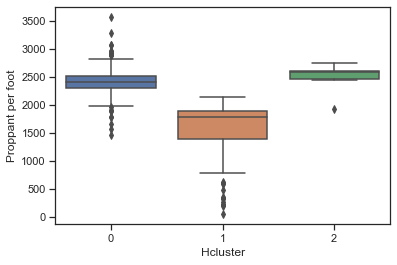

In [33]:
sns.boxplot(x=df_clean_3['Hcluster'], y=df_clean_3['Proppant per foot'])

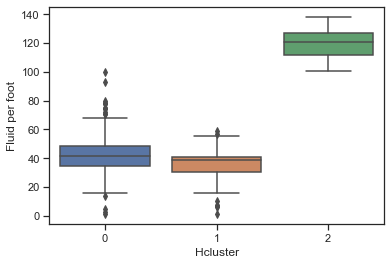

In [34]:
sns.boxplot(x=df_clean_3['Hcluster'], y=df_clean_3['Fluid per foot'])

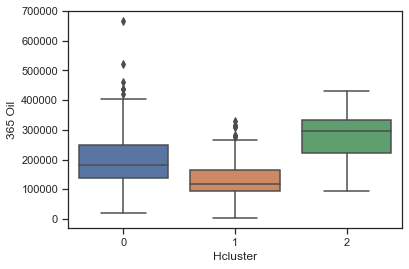

In [36]:
sns.boxplot(x=df_clean_3['Hcluster'], y=df_clean_3['365 Oil'])

### 180 model

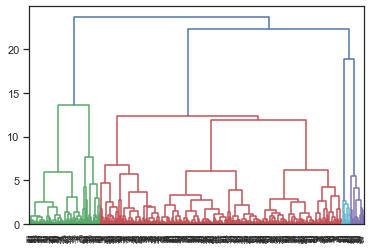

In [50]:
df_clean_4 = df [[ '180 oil', 'Proppant per foot', 
       'Fluid per foot']]

s_scaler = StandardScaler()
df_s_4 = s_scaler.fit_transform(df_clean_4)

hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(df_s_4)

dendrogram = sch.dendrogram(sch.linkage(df_s_4, method='ward'))

C:\Users\m7md2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


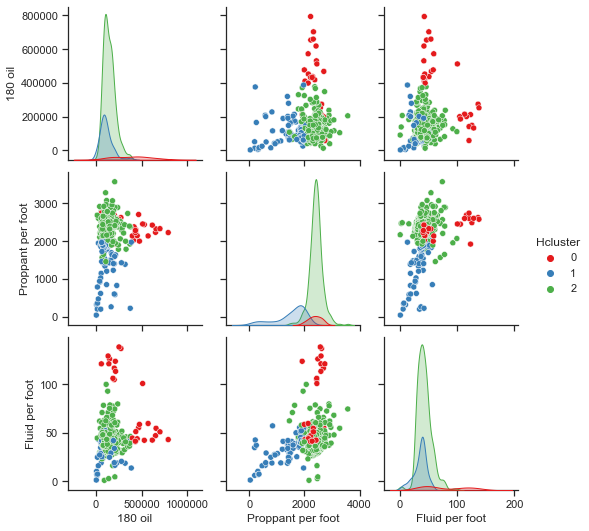

In [51]:
df_clean_4['Hcluster'] = y_hc # Create a new column in df that refers to the rocktypes created

sns.set(style = 'ticks') # Set the background to dark

sns.pairplot(df_clean_4, palette = "Set1", vars = [ '180 oil','Proppant per foot', 'Fluid per foot'], hue = 'Hcluster') 

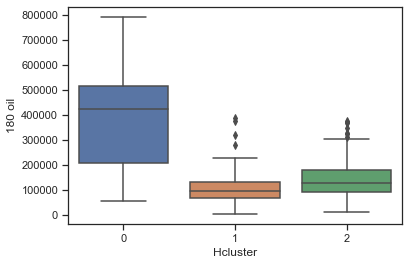

In [52]:
sns.boxplot(x=df_clean_4['Hcluster'], y=df_clean_4['180 oil'])

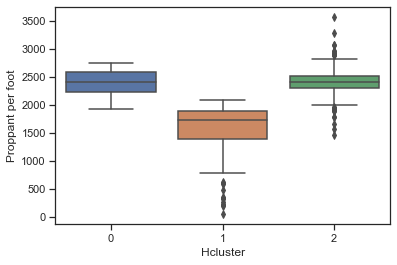

In [53]:
sns.boxplot(x=df_clean_4['Hcluster'], y=df_clean_4['Proppant per foot'])

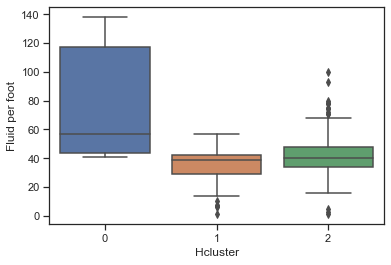

In [54]:
sns.boxplot(x=df_clean_4['Hcluster'], y=df_clean_4['Fluid per foot'])

# Supervised Learning

## KNN Classification

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

from sklearn import neighbors
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [56]:
df.columns

Index(['Proppant size', 'Fluid type', '180 oil', '365 Oil',
       'Horizontal Length', 'Lat', 'Long', 'Proppant per foot',
       'Fluid per foot', 'ft/stage', 'Year', 'slickwater', 'water/gel'],
      dtype='object')

In [61]:
from scipy import stats

sub = df_clean_1[['365 Oil', 'Proppant per foot','Fluid per foot']]

sub = sub[(np.abs(stats.zscore(sub)) < 3).all(axis=1)]

df_2 = df_clean_1.merge(sub,on=['365 Oil', 'Proppant per foot','Fluid per foot'])

### 365 model

In [71]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import MinMaxScaler

df_clean_5 = df_2[['365 Oil', 'Proppant per foot','Fluid per foot']].to_numpy()
clusters = df_2[['kmeans Cluster']].to_numpy()
#Hcluster
x_train, x_test, y_train, y_test = train_test_split(df_clean_5, clusters, test_size=0.15,stratify=clusters)

#Scale data using MinMax
scaler = MinMaxScaler(feature_range=(0, 1))
    
#Fit the whole set of data in the scaler and scale it 
df_3_scaled = scaler.fit(df_clean_5)
    
#Transform the train data to scaled, with the
x_train_scaled = scaler.transform(x_train)
    
#Transform the test data to scaled, with the 
x_test_scaled  = scaler.transform(x_test)

C:\Users\m7md2\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\m7md2\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\m7md2\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\m7md2\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\m7md2\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

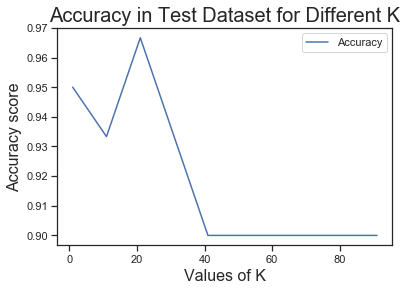

In [72]:
#To store accuracy values for different k
accuracy_val = [] 

#To store  k values
k_val = []

#To store precision values for different k
precision_val=[]

#To store recall values for different k
recall_val=[]

for K in range(1, 101, 10):              

    #Define knn as KNeighborsClassifier for each K intiated from for loop
    knn = KNeighborsClassifier(n_neighbors=K)
    
    #Fit the knn based on train data
    knn.fit(x_train_scaled, y_train) 
    
    #Predict the RockType based on test data
    y_pred = knn.predict(x_test_scaled)
    
    #Store the value of K
    k_val.append(K)
    
    #Store the value of accuracy
    accuracy_val.append(accuracy_score(y_test, y_pred))
    
    #Store the value of precision of each RockType
    precision_val.append(precision_score(y_test, y_pred, average=None))
    
    #Store the value of recall of each RockType
    recall_val.append(recall_score(y_test, y_pred, average=None))

    
#Plot K vs accuracy value at each K 
plt.plot(k_val, accuracy_val, label = 'Accuracy')
plt.xlabel ('Values of K', fontsize = 16)
plt.ylabel ('Accuracy score', fontsize = 16)
plt.title ('Accuracy in Test Dataset for Different K', fontsize = 20)
plt.legend()  

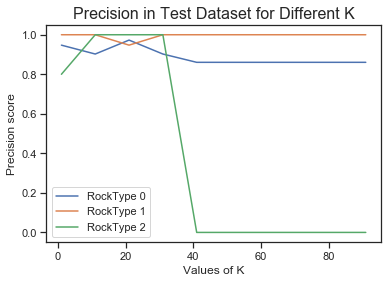

In [73]:
#converting nested list to np array
precision_val = np.array(precision_val)    

plt.plot(k_val, precision_val[:,0], label = 'RockType 0' )
plt.plot(k_val, precision_val[:,1], label = 'RockType 1' )
plt.plot(k_val, precision_val[:,2], label = 'RockType 2' )
plt.xlabel ('Values of K')
plt.ylabel ('Precision score')
plt.title ('Precision in Test Dataset for Different K', fontsize = 16)
plt.legend()  

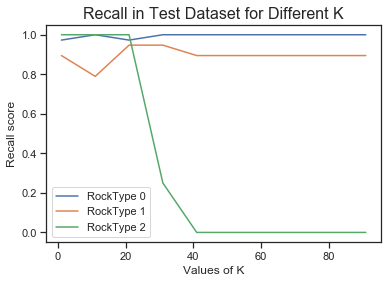

In [74]:
#converting nested list to np array
recall_val = np.array(recall_val)    

plt.plot(k_val, recall_val[:,0], label = 'RockType 0' )
plt.plot(k_val, recall_val[:,1], label = 'RockType 1' )
plt.plot(k_val, recall_val[:,2], label = 'RockType 2' )
plt.xlabel ('Values of K')
plt.ylabel ('Recall score')
plt.title ('Recall in Test Dataset for Different K', fontsize = 16)
plt.legend()

In [69]:
knn = KNeighborsClassifier(n_neighbors=6)
   
#Split data to test and train from Drilling Data with RockType label, test_size=0.3 and stratify based on RockType
x_train, x_test, y_train, y_test = train_test_split(df_clean_5, clusters, test_size=0.3,random_state=20,stratify=clusters)

#Scale data using MinMax
scaler = MinMaxScaler(feature_range=(0, 1))

#Fit the whole set of data in the scaler and scale it, so min and max values are based on the drilling data 
df_3 = scaler.fit(df_clean_5)

#Transform the train data to scaled, with the fitting from DrillingData
x_train_scaled = scaler.transform(x_train)

#Transform the test data to scaled, with the fitting from DrillingData
x_test_scaled  = scaler.transform(x_test)

#Fit the knn based on train data
knn.fit(x_train_scaled, y_train) 

y_pred = knn.predict(x_test_scaled)


C:\Users\m7md2\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [70]:
#Print Confusion Matrix data
print ('Confusion Matrix :')
print (confusion_matrix(y_test, y_pred)) 
print ('Accuracy Score : ', accuracy_score(y_test, y_pred) )
print ('Report : ')
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[71  2  0]
 [ 1 37  0]
 [ 0  1  8]]
Accuracy Score :  0.9666666666666667
Report : 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        73
           1       0.93      0.97      0.95        38
           2       1.00      0.89      0.94         9

    accuracy                           0.97       120
   macro avg       0.97      0.95      0.96       120
weighted avg       0.97      0.97      0.97       120



### 180 model

## Results were unreasonable form knn model so 180 model was not constructed and other supervised learning methods are going to be explored

## Random Forrest 

### 365 model

In [87]:
x_train, x_test, y_train, y_test = train_test_split(df_clean_5, clusters, test_size=0.25,stratify=clusters)

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

r_clf = RandomForestClassifier(n_estimators = 1000, max_depth=5, max_features=3)
r_clf.fit(x_train,y_train)

from sklearn.metrics import classification_report, confusion_matrix  
y_rf_pred=r_clf.predict(x_test)

print(confusion_matrix(y_test,y_rf_pred)) 
print(classification_report(y_test,y_rf_pred))

C:\Users\m7md2\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[[56  3  2]
 [ 1 31  0]
 [ 1  0  6]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        61
           1       0.91      0.97      0.94        32
           2       0.75      0.86      0.80         7

    accuracy                           0.93       100
   macro avg       0.88      0.91      0.89       100
weighted avg       0.93      0.93      0.93       100



Variable: 365 Oil              Importance: 0.62
Variable: Proppant per foot    Importance: 0.27
Variable: Fluid per foot       Importance: 0.11


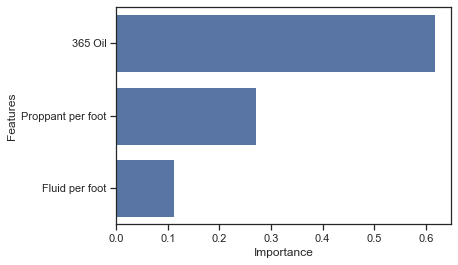

In [88]:
importances = list(r_clf.feature_importances_)

feature_list=list(['365 Oil', 'Proppant per foot','Fluid per foot'])

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

feature_dataframe = pd.DataFrame(data = feature_list, columns = ['Features'])
feature_dataframe['Importance'] = importances

sns.set(style = 'ticks')
sns.barplot(x = 'Importance', y = 'Features', data = feature_dataframe, color="b")

In [89]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle = True, random_state=125)

from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [4, 6], 'min_samples_split': [20, 30], 'n_estimators': [100, 500, 1000]} 
grid = GridSearchCV(r_clf, param_grid=param_grid, cv=cv, verbose=3)
grid.fit(x_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100, score=1.000, total=   0.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100, score=0.967, total=   0.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100, score=0.833, total=   0.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100, score=0.967, total=   0.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100, score=0.933, total=   0.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100, score=0.967, total=   0.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100, score=0.900, total=   0.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100, score=0.867, total=   0.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100, score=0.933, total=   0.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=100, score=0.931, total=   0.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500, score=1.000, total=   0.8s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500, score=0.967, total=   0.9s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500, score=0.833, total=   0.7s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500, score=0.967, total=   0.8s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500, score=0.933, total=   0.6s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500, score=0.967, total=   0.6s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500, score=0.900, total=   0.6s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500, score=0.900, total=   0.6s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500, score=0.933, total=   0.6s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=500, score=0.931, total=   0.6s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000, score=1.000, total=   1.0s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000, score=0.967, total=   1.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000, score=0.833, total=   1.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000, score=0.967, total=   1.0s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000, score=0.967, total=   1.2s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000, score=0.967, total=   1.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000, score=0.900, total=   1.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000, score=0.900, total=   1.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000, score=0.900, total=   1.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=20, n_estimators=1000, score=0.931, total=   1.0s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100 
[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100, score=0.967, total=   0.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100 
[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100, score=0.967, total=   0.1s

C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100 
[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100, score=0.800, total=   0.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100 
[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100, score=0.967, total=   0.1s

C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100 
[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100, score=0.900, total=   0.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100 
[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100, score=0.967, total=   0.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100 

C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100, score=0.900, total=   0.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100 
[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100, score=0.867, total=   0.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100, score=0.900, total=   0.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100 
[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=100, score=0.931, total=   0.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500, score=1.000, total=   0.6s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500, score=0.967, total=   0.5s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500, score=0.800, total=   0.5s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500, score=0.967, total=   0.5s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500, score=0.900, total=   0.7s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500, score=0.967, total=   0.6s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500, score=0.900, total=   0.7s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500, score=0.867, total=   0.6s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500, score=0.900, total=   0.6s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=500, score=0.931, total=   0.5s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000, score=1.000, total=   1.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000, score=0.967, total=   1.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000, score=0.800, total=   1.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000, score=0.967, total=   1.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000, score=0.933, total=   1.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000, score=0.967, total=   1.0s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000, score=0.900, total=   1.0s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000, score=0.867, total=   1.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000, score=0.900, total=   1.1s
[CV] bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=4, min_samples_split=30, n_estimators=1000, score=0.931, total=   1.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100, score=1.000, total=   0.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100, score=0.933, total=   0.1s

C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100, score=0.833, total=   0.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100, score=0.967, total=   0.1s

C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100, score=0.967, total=   0.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100, score=0.967, total=   0.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100, score=0.900, total=   0.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100, score=0.900, total=   0.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100, score=0.900, total=   0.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=100, score=0.931, total=   0.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500 
[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500, score=1.000, total=   0.5s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500, score=0.967, total=   0.6s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500, score=0.867, total=   0.5s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500, score=0.967, total=   0.5s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500, score=0.900, total=   0.5s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500, score=0.967, total=   0.5s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500, score=0.900, total=   0.5s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500, score=0.900, total=   0.6s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500, score=0.900, total=   0.6s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=500, score=0.931, total=   0.5s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000, score=1.000, total=   1.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000, score=0.967, total=   1.0s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000 
[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000, score=0.867, total=   1.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000, score=0.967, total=   1.0s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000, score=0.967, total=   1.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000, score=0.967, total=   1.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000, score=0.900, total=   1.0s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000, score=0.900, total=   1.0s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000, score=0.900, total=   1.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=20, n_estimators=1000, score=0.931, total=   1.0s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100, score=0.967, total=   0.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100, score=0.967, total=   0.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100, score=0.800, total=   0.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100, score=0.967, total=   0.1s

C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100, score=0.933, total=   0.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100, score=0.967, total=   0.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100, score=0.900, total=   0.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100, score=0.900, total=   0.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100, score=0.900, total=   0.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=100, score=0.931, total=   0.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500, score=1.000, total=   0.6s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500, score=0.967, total=   0.6s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500, score=0.800, total=   0.6s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500, score=0.967, total=   0.5s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500, score=0.967, total=   0.6s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500, score=0.967, total=   0.5s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500, score=0.900, total=   0.5s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500, score=0.867, total=   0.5s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500, score=0.900, total=   0.6s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=500, score=0.931, total=   0.6s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000, score=1.000, total=   1.0s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000, score=0.967, total=   1.0s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000, score=0.800, total=   1.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000, score=0.967, total=   1.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000, score=0.967, total=   1.0s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000, score=0.967, total=   1.0s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000, score=0.900, total=   1.0s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000, score=0.867, total=   1.1s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000, score=0.900, total=   1.0s
[CV] bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000 


C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=6, min_samples_split=30, n_estimators=1000, score=0.931, total=   1.5s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.2min finished
C:\Users\m7md2\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=KFold(n_splits=10, random_state=125, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=3,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=1000, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [ ]:
df_clean_2

In [90]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results_tiny = cv_results[['param_max_depth', 'param_min_samples_split', 'mean_test_score','std_test_score']]
cv_results_tiny.sort_values(by='mean_test_score', ascending=False).head(5)

,param_max_depth,param_min_samples_split,mean_test_score,std_test_score
8,6,20,0.936455,0.040780
1,4,20,0.933110,0.044801
2,4,20,0.933110,0.047224
0,4,20,0.929766,0.048259
6,6,20,0.929766,0.045891


In [91]:
cv_results.sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
8,0.994990,0.022473,0.063829,0.007137,True,6,20,1000,"{'bootstrap': True, 'max_depth': 6, 'min_sampl...",1.0,...,0.966667,0.966667,0.966667,0.9,0.900000,0.900000,0.931034,0.936455,0.040780,1
1,0.620093,0.102297,0.043184,0.014054,True,4,20,500,"{'bootstrap': True, 'max_depth': 4, 'min_sampl...",1.0,...,0.966667,0.933333,0.966667,0.9,0.900000,0.933333,0.931034,0.933110,0.044801,2
2,1.013190,0.036811,0.067918,0.005840,True,4,20,1000,"{'bootstrap': True, 'max_depth': 4, 'min_sampl...",1.0,...,0.966667,0.966667,0.966667,0.9,0.900000,0.900000,0.931034,0.933110,0.047224,2
0,0.116988,0.010413,0.008576,0.002684,True,4,20,100,"{'bootstrap': True, 'max_depth': 4, 'min_sampl...",1.0,...,0.966667,0.933333,0.966667,0.9,0.866667,0.933333,0.931034,0.929766,0.048259,4
6,0.110304,0.011761,0.008179,0.001658,True,6,20,100,"{'bootstrap': True, 'max_depth': 6, 'min_sampl...",1.0,...,0.966667,0.966667,0.966667,0.9,0.900000,0.900000,0.931034,0.929766,0.045891,4


In [92]:
r_clf = RandomForestClassifier(n_estimators = 1000, max_depth=6, max_features=3, min_samples_split = 20)
r_clf.fit(x_train,y_train)

from sklearn.metrics import classification_report, confusion_matrix  
y_rf_pred=r_clf.predict(x_test)

print(confusion_matrix(y_test,y_rf_pred)) 
print(classification_report(y_test,y_rf_pred))

C:\Users\m7md2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[57  3  1]
 [ 0 32  0]
 [ 1  0  6]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        61
           1       0.91      1.00      0.96        32
           2       0.86      0.86      0.86         7

    accuracy                           0.95       100
   macro avg       0.92      0.93      0.92       100
weighted avg       0.95      0.95      0.95       100



In [93]:
grid_new=grid.best_estimator_
print('memorization performance: ', grid_new.score(x_train,y_train)) 

print('generalization performance: ', grid_new.score(x_test,y_test))


memorization performance:  0.9732441471571907
generalization performance:  0.95


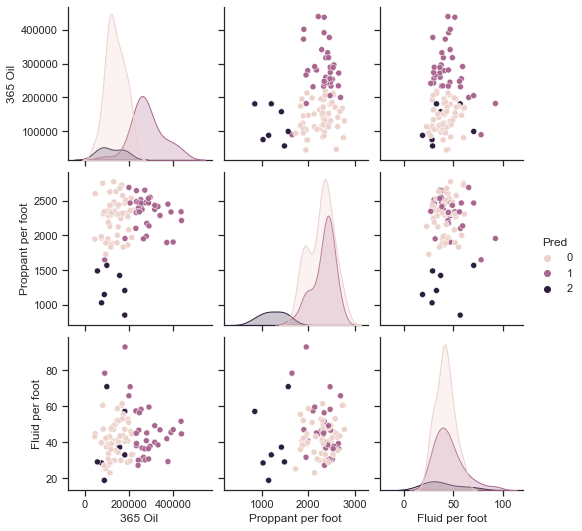

In [94]:
dataframe_test = pd.DataFrame(data = x_test, columns = ['365 Oil', 'Proppant per foot','Fluid per foot'] )
dataframe_test['Pred'] = y_rf_pred
dataframe_test['True'] = y_test

sns.pairplot(dataframe_test, vars =['365 Oil', 'Proppant per foot','Fluid per foot'], hue = 'Pred')

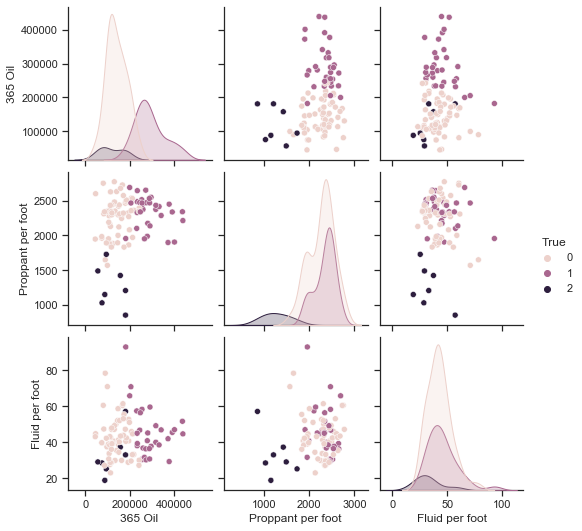

In [97]:
sns.pairplot(dataframe_test, vars =['365 Oil', 'Proppant per foot','Fluid per foot'], hue = 'True')

In [96]:
dataframe_test

,365 Oil,Proppant per foot,Fluid per foot,Pred,True
0,149868.0,2421.669147,38.618690,0,0
1,371952.0,1897.120452,41.964675,1,1
2,233465.0,2487.502263,38.094954,1,1
3,234044.0,2646.149740,39.328874,1,1
4,137871.0,2318.823058,50.019913,0,0
...,...,...,...,...,...
95,147267.0,1999.900843,58.595188,0,0
96,171369.0,2575.797988,53.025176,0,0
97,105707.0,2189.293742,30.789997,0,0
98,88002.0,1145.699428,18.951310,2,2
